
# Importing libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [72]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

# Data Exploration

In [73]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [75]:
train.shape

(8523, 12)

In [76]:
test.shape

(5681, 11)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [79]:
data = pd.concat([train, test])
print(data.shape)

(14204, 12)


## Feature Engineering

In [80]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [81]:
# Displaying the mean sales by type of store.
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [82]:
data["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

Item_Visibility **Std** is 0. So, we can remove this feature.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


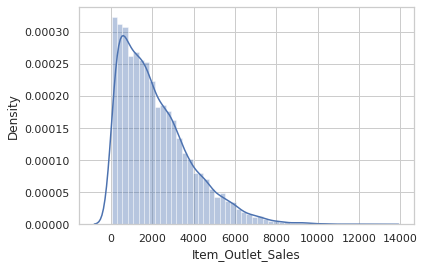

In [83]:
sns.distplot(a = data['Item_Outlet_Sales'])

In [84]:
print ("Skew is:", data.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % data.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


In [85]:
data.groupby(["Item_Identifier","Item_Type"]).size()

Item_Identifier  Item_Type         
DRA12            Soft Drinks            9
DRA24            Soft Drinks           10
DRA59            Soft Drinks           10
DRB01            Soft Drinks            8
DRB13            Soft Drinks            9
                                       ..
NCZ30            Household             10
NCZ41            Health and Hygiene     8
NCZ42            Household             10
NCZ53            Health and Hygiene     9
NCZ54            Household             10
Length: 1559, dtype: int64

We can clearly observe that the First 2 characters of the Item ID is same for the One kind of Item Type. Example: DR is the code for Soft Drinks, NC is the code of Non- Consumable Products and FD is for Food products

In [86]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

In [87]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [88]:
def item_type(data):
    #Get the first two characters of ID:
    data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
    #Rename them to more intuitive categories:
    data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                                 'NC':'Non-Consumable',
                                                                 'DR':'Drinks'})
    print(data['Item_Type_Combined'].value_counts())


In [89]:
item_type(data)

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64


In [161]:
data['Outlet_Location_Type'].unique()

array([0, 2, 1])

# Exploratory Data Analysis

##### Univariate data analysis

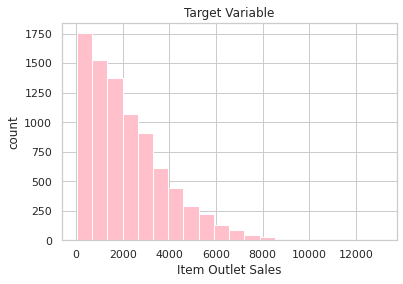

In [90]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [91]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

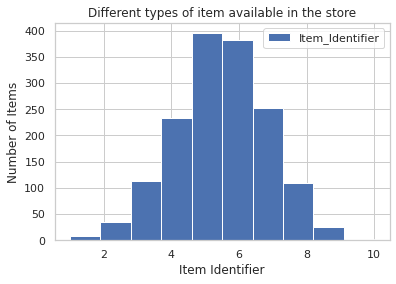

In [92]:
# we will analyze only the training set
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [93]:
# checking the different items in Item Fat Content
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [94]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

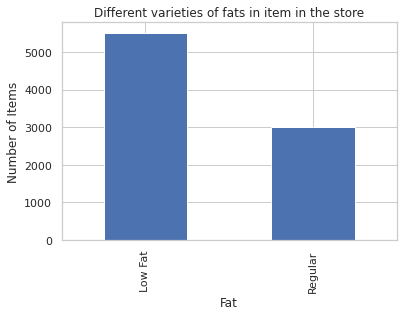

In [95]:
# checking different varieties of item fat content
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show() 

In [96]:
# checking the different items in Item Type
train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

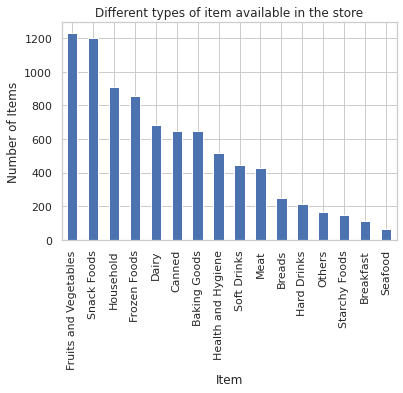

In [97]:
# we will analyze only the training set
train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [98]:
# checking the different types of Outlet Identifier
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

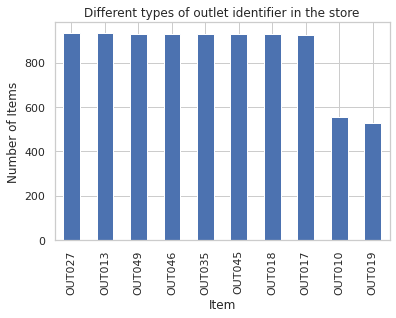

In [99]:
# we will analyze only the training set
train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [100]:
# checking the different types of Outlet Size
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

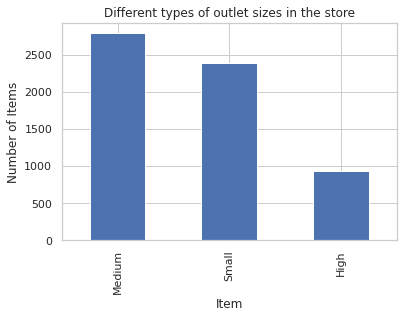

In [101]:
# we will analyze only the training set
train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [102]:
# checking different types of items in Outlet Location Type
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

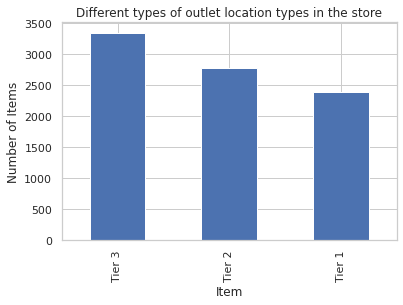

In [103]:
# we will analyze only the training set
train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [104]:
# checking different types of item in Outlet Type
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

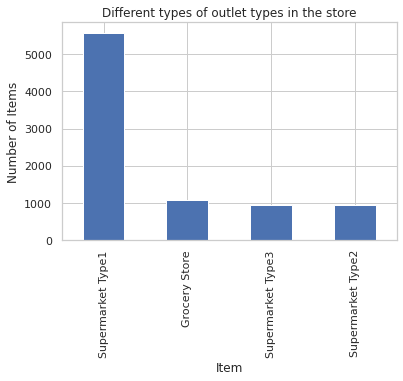

In [105]:
# we will analyze only the training set
train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [106]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [107]:
train['Years_Established'].value_counts()

37    1463
35     932
23     930
25     930
18     930
20     929
13     928
15     926
24     555
Name: Years_Established, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


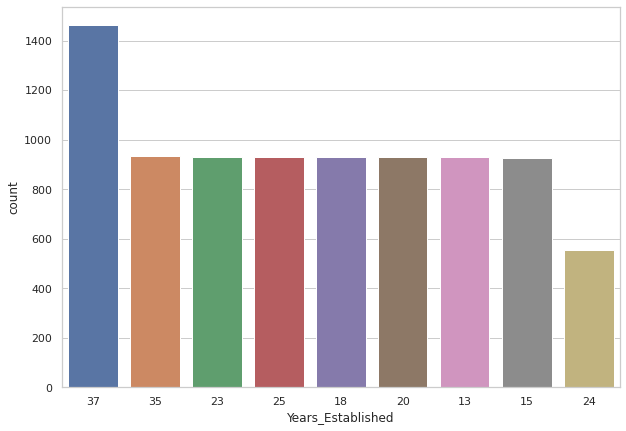

In [108]:
plt.figure(figsize = (10,7))
sns.countplot('Years_Established', data = train, order = train['Years_Established'].value_counts().index )

#####  Multivariate analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


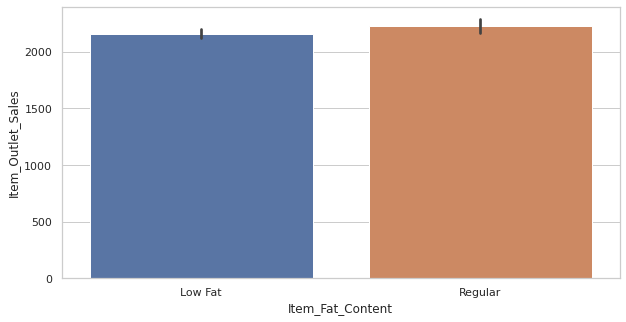

In [109]:
plt.figure(figsize = (10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data = train)

**Note**: 
#### The Item Outles sales are high for both Low Fat and Regular Item types.

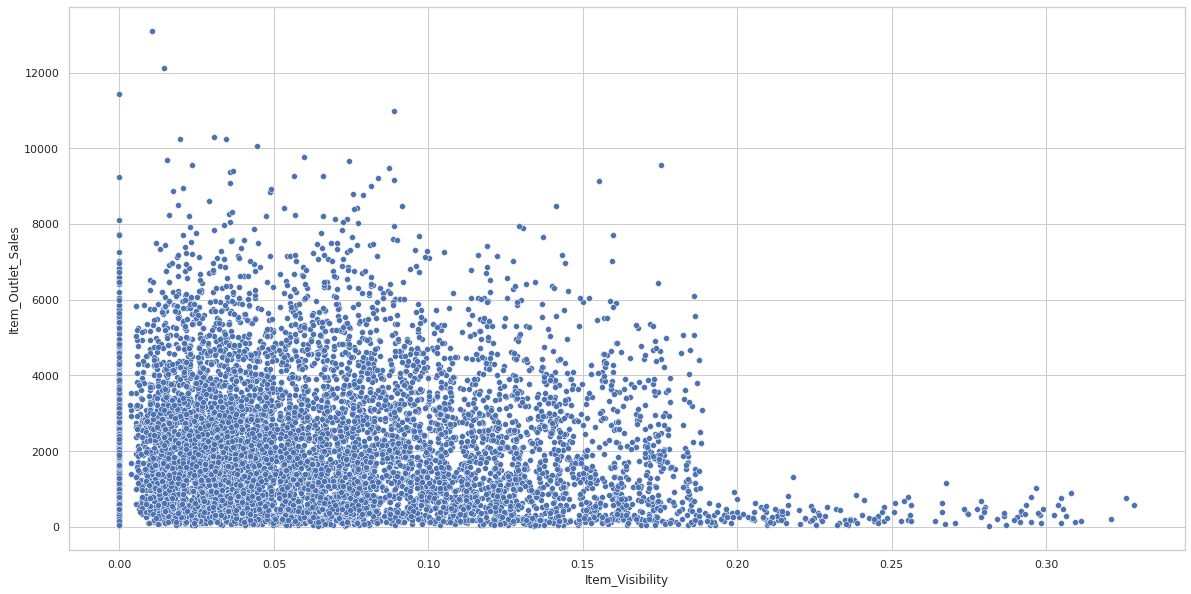

In [110]:
# plt.scatter('Item_Visibility','Item_Outlet_Sales', data = train)
plt.figure(figsize = (20,10))
sns.scatterplot(x=train["Item_Visibility"], y=train["Item_Outlet_Sales"])

### **Note** : Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0. 

In [111]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

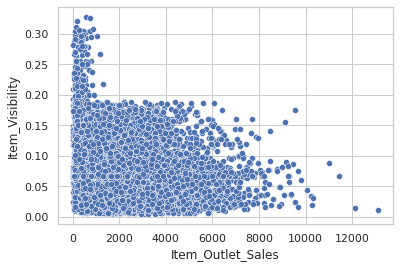

In [112]:
sns.scatterplot(y='Item_Visibility',x='Item_Outlet_Sales',data=train)

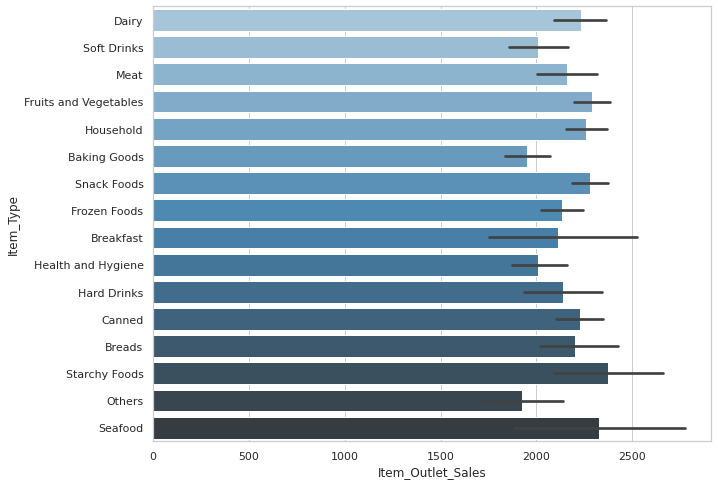

In [113]:
plt.figure(figsize = (10,8))
sns.barplot(x="Item_Outlet_Sales", y="Item_Type", data=train,palette="Blues_d")

### **Note**: The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

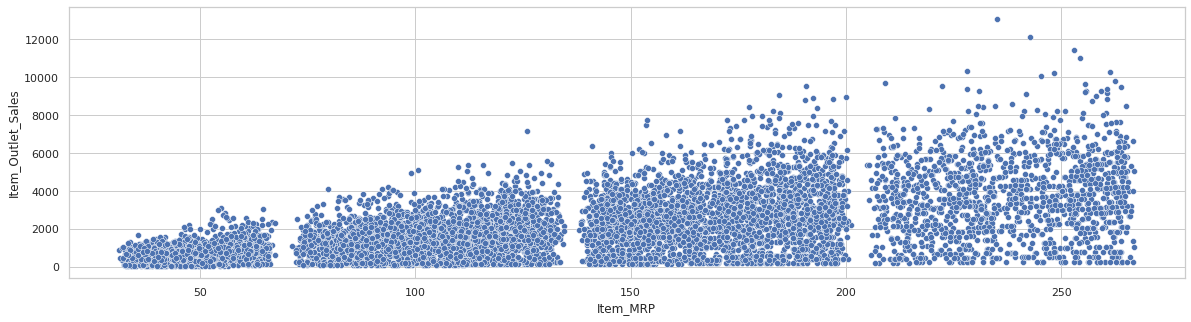

In [114]:
plt.figure(figsize =(20,5))
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train)

### **Note**: Items MRP ranging from 200-250 dollars is having high Sales

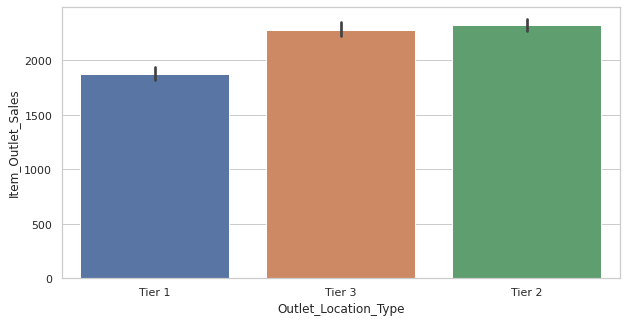

In [115]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data = train )

### **Note**: The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets


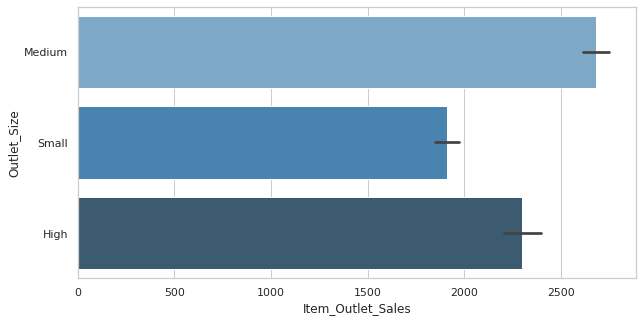

In [116]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Item_Outlet_Sales',y = 'Outlet_Size',data = train, order= train['Outlet_Size'].value_counts().index ,palette="Blues_d")

**Note**: The Outlet Sales is maximum for Medium and High sized Outlets. The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

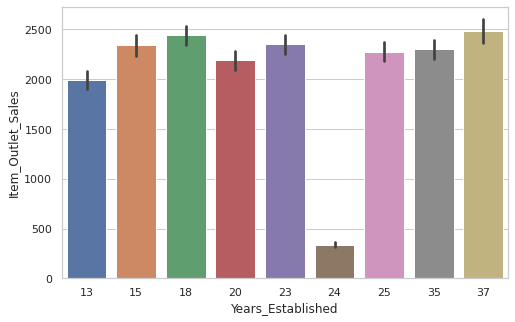

In [117]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train)

### **Note**:It is quiet evident that Outlets established 35 years before is having good Sales margin. We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

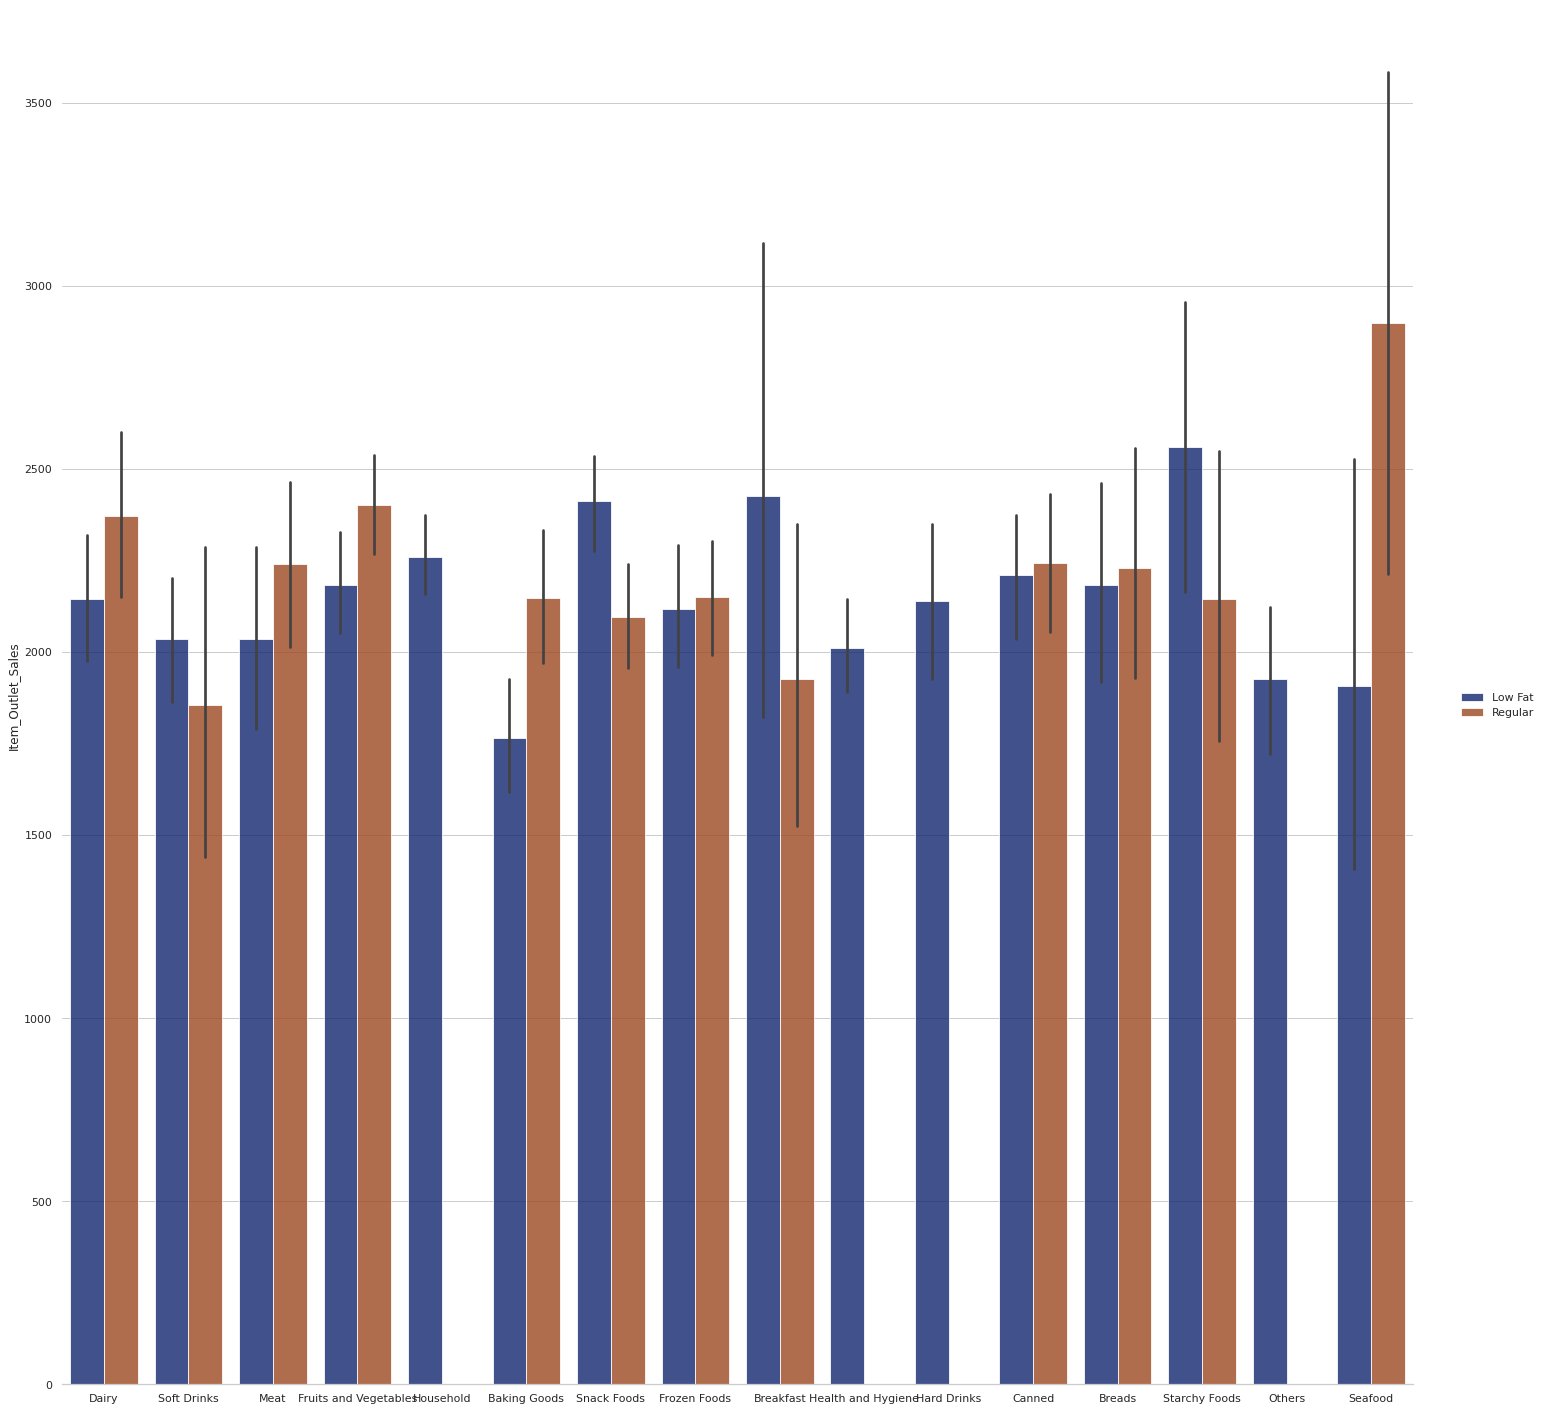

In [118]:
sns.set_theme(style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=train, kind="bar",
    x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content",
     palette="dark", alpha=.8, height=20
)
g.despine(left=True)
g.set_axis_labels("", "Item_Outlet_Sales")
g.legend.set_title("")

## Data Preprocessing

In [119]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [120]:
# checking unique values in the columns of train dataset
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 2
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Item_Type_Combined               3
dtype: int64

In [121]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Type_Combined              0
dtype: int64

In [122]:
# imputing missing values
data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_Combined           0
dtype: int64

In [123]:
# determining the operation peroid of a time
data['Outlet_Years'] = 2022 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

37    2439
35    1553
23    1550
25    1550
18    1550
20    1548
13    1546
15    1543
24     925
Name: Outlet_Years, dtype: int64

In [124]:
# removing unnecassary columns from the dataset
remove_cols = [
    'Item_Type',
    'Outlet_Establishment_Year',
    'Item_Visibility',
    'Item_Identifier',
    'Outlet_Identifier'
]
data = data.drop(remove_cols,axis =1)
data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.30,Low Fat,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,5.92,Regular,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,17.50,Low Fat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,19.20,Regular,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food,24
4,8.93,Low Fat,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


In [125]:
data.shape

(14204, 9)

### Label Encoding

In [128]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(data):
  var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
  le = LabelEncoder()
  for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [129]:
label_encoding(data)

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.30,1,249.8092,1,0,1,3735.1380,1,23
1,5.92,2,48.2692,1,2,2,443.4228,0,13
2,17.50,1,141.6180,1,0,1,2097.2700,1,23
3,19.20,2,182.0950,1,2,0,732.3800,1,24
4,8.93,1,53.8614,0,2,1,994.7052,2,35


In [131]:
data.shape

(14204, 9)

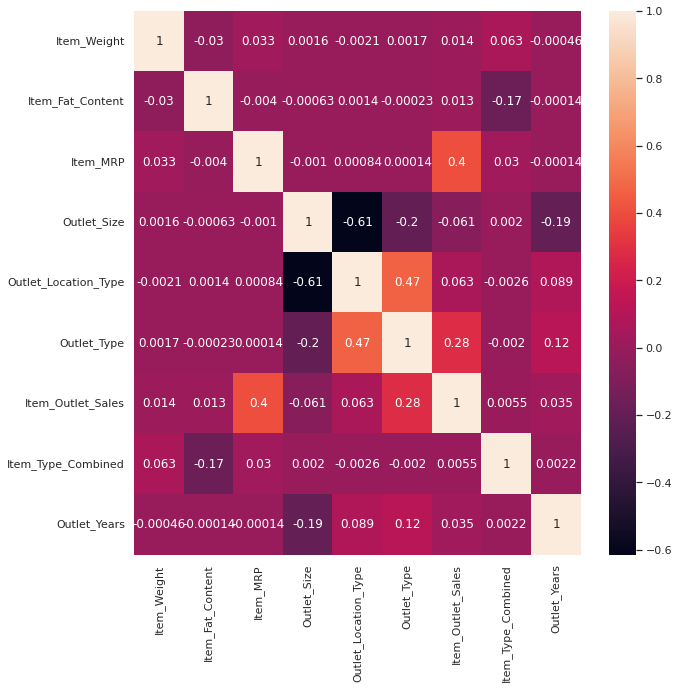

In [133]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True)

In [134]:
y = data.Item_Outlet_Sales.values
X = data.drop('Item_Outlet_Sales',axis = 1)

In [135]:
print(X.shape,y.shape)

(14204, 8) (14204,)


### Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [137]:
cols = [ 
    'Item_Weight',
    'Item_MRP',
    'Outlet_Years'
]
X[cols]

,Item_Weight,Item_MRP,Outlet_Years
0,9.30,249.8092,23
1,5.92,48.2692,13
2,17.50,141.6180,23
3,19.20,182.0950,24
4,8.93,53.8614,35
...,...,...,...
5676,10.50,141.3154,25
5677,7.60,169.1448,13
5678,10.00,118.7440,20
5679,15.30,214.6218,15


In [138]:
X[cols]  =  sc.fit_transform(X[cols])

In [139]:
X.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
0,-0.824939,0,1.752511,1,0,1,1,-0.139681
1,-1.623224,1,-1.493696,1,2,2,0,-1.334228
2,1.111729,0,0.009874,1,0,1,1,-0.139681
3,1.513233,1,0.661838,1,2,0,1,-0.020226
4,-0.912325,0,-1.403623,0,2,1,2,1.293777


In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2,random_state = 2 )

In [141]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11363, 8) (2841, 8) (11363,) (2841,)


# Model Bulding

#### Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
# predicting the  test set results
y_pred = lr.predict(X_test)
print(y_pred)

[1064.17008013  689.38612061 2155.61529197 ... 2147.60849503 1949.73543871
 1460.45724299]


In [143]:
# finding the mean squared error and variance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",lr.score(X,y))

RMSE : 1241.3564744891978
Variance score: 0.25
Result : 0.2519751575214635


### AdaBoost Regressor

In [144]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor(n_estimators = 100)
ada.fit(X_train, y_train)

# predicting the test set results
y_pred1 = ada.predict(X_test)

# RMSE
mse1 = mean_squared_error(y_test, y_pred1)
print("RMSE :", np.sqrt(mse1))
print('Variance score: %.2f' % r2_score(y_test, y_pred1))
print("Result :",ada.score(X_train, y_train))

RMSE : 1329.3098524066613
Variance score: 0.14
Result : 0.1626956471620319


### XgBoost Regressor

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

# predicting the test set results
y_pred2 = xgb.predict(X_test)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred2)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred2))
print("Result :",xgb.score(X_train, y_train))

RMSE : 1211.5539537778109
Variance score: 0.28
Result : 0.339245386633256


### Random Forest Regression



In [146]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
rf.fit(X_train, y_train)

# predicting the  test set results
y_pred3 = rf.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred3)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred3))

print("Result :",rf.score(X_train, y_train))

[1064.17008013  689.38612061 2155.61529197 ... 2147.60849503 1949.73543871
 1460.45724299]
RMSE : 1356.1818886489737
Variance score: 0.10
Result : 0.8823945053098501


### Decision Tree Regresor

In [147]:
from pandas._libs.tslibs import dtypes
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# predicting the test set results
y_pred4 = dt.predict(X_test)
print(y_pred4)

print(" RMSE : " , np.sqrt(((y_test - y_pred4)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred4))
print("Result :",dt.score(X_train, y_train))

[ 958.752   591.2304  589.233  ... 2460.7968  958.752   958.752 ]
 RMSE :  1752.652565804163
Variance score: -0.50
Result : 0.997875441713389


### Support vector machine

In [149]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

# predicting the x test results
y_pred5 = svr.predict(X_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred5)
print("RMSE :", np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred5))
print("Result :",svr.score(X_train, y_train))

RMSE : 1538.3609359398395
Variance score: -0.16
Result : -0.16457286436036944


### Hyperparameter tuning

###### RandomizedSearchCV

In [150]:
from sklearn.model_selection import RandomizedSearchCV # Number of trees in random forest
param = {
    'max_depth':[6,9,12,15],
    'min_samples_leaf':[10,50,100,150]
}
DT = DecisionTreeRegressor()
rf_random = RandomizedSearchCV(estimator = DT, param_distributions = param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 9, 12, 15],
                                        'min_samples_leaf': [10, 50, 100, 150]},
                   random_state=42, verbose=2)

In [151]:
rf_random.score(X_train, y_train)

0.30895188220015934

In [152]:
rf_random.score(X_test, y_test)

0.2870820500422657

Hyperperameter tuning did not drastically change the model performance so we will be using the default DecisionTreeRegressor as our model.



### Model Deployment


In [153]:
import pickle

In [154]:
pickle.dump(dt,open('model.pkl','wb'))